In [52]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import scipy.interpolate as interp
import pandas as pd
# ensure the notebook generate the same randomess
np.random.seed(1)


In [53]:
def bet_Bayes_Nash(N, vi):
    return (N-1)/N*vi

In [54]:
def bet_random(v):
    return np.random.uniform(0,v)

In [16]:
N = 2
R = [10**3,10**5, 10**7]


### Gdy wszyscy gracze przyjmują jako strategię równowagę Bayesa-Nasha

In [17]:
PoA = []
for r in R: 
    v = np.random.uniform(0,1,(N,r))
    b =  bet_Bayes_Nash(N,v)

    x=np.argmax(b, axis=0)
    Welf = v[x, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA.append(np.mean(Welf/Opt))
print(R)
print(PoA)
pd.DataFrame({"R":R, 'PoA':PoA})

[1000, 100000, 10000000]
[1.0, 1.0, 1.0]


,R,PoA
0,1000,1.0
1,100000,1.0
2,10000000,1.0


### Gdy oferty są losowe

In [127]:
N = 2
R = [10, 10**3,10**5, 10**7]

In [128]:
PoA = []
for r in R: 
    v = np.random.uniform(0,1,(N,r))
    b =  bet_random(v)

    x=np.argmax(b, axis=0)
    Welf = v[x, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA.append(np.mean(Welf/Opt))

pd.DataFrame({"R":R, 'PoA':PoA})

,R,PoA
0,10,0.949674
1,1000,0.922106
2,100000,0.917843
3,10000000,0.916749


In [129]:
n = 100
r = 50

In [130]:
PoA_mean = []
PoA_min = []
PoA_max = []

for N in range(1,n): 
    v = np.random.uniform(0,1,(N,r))
    b =  bet_random(v)
    winner=np.argmax(b, axis=0)
    Welf = v[winner, np.arange(r)]
    Opt =v.max(axis = 0)
    PoA = Welf/Opt
    PoA_mean.append(np.mean(PoA))
    PoA_min.append(min(PoA))
    PoA_max.append(max(PoA))



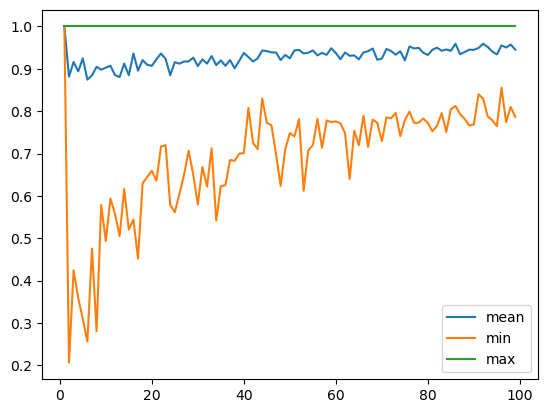

In [131]:
fig, ax = plt.subplots()
x = list(range(1,n))
ax.plot(x,PoA_mean, label = 'mean')
ax.plot(x,PoA_min, label = 'min')
ax.plot(x,PoA_max, label = 'max')
ax.legend()

In [43]:
N = 5
R = 100_000

v = np.random.uniform(0,1,(N,R))

# BNE in first-price sealed bid

b_star = lambda vi,N :((N-1)/N) * vi
b = b_star(v,N)



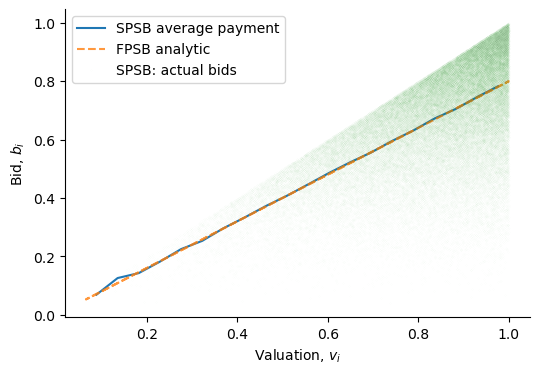

In [44]:
idx = np.argsort(v, axis=0)  # Biders' values are sorted in ascending order in each auction.
# We record the order because we want to apply it to bid price and their id.

v = np.take_along_axis(v, idx, axis=0)  # same as np.sort(v, axis=0), except now we retain the idx
b = np.take_along_axis(b, idx, axis=0)

ii = np.repeat(np.arange(1,N+1)[:,None], R, axis=1)  # the id for the bidders is created.
ii = np.take_along_axis(ii, idx, axis=0)  # the id is sorted according to bid price as well.

winning_player = ii[-1,:] # In FPSB and SPSB, winners are those with highest values.

winner_pays_fpsb = b[-1,:]  # highest bid
winner_pays_spsb = v[-2,:]  # 2nd-highest valuation


binned = stats.binned_statistic(v[-1,:], v[-2,:], statistic='mean', bins=20)
xx = binned.bin_edges
xx = [(xx[ii]+xx[ii+1])/2 for ii in range(len(xx)-1)]
yy = binned.statistic

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(xx, yy, label='SPSB average payment')
ax.plot(v[-1,:], b[-1,:], '--', alpha = 0.8, label = 'FPSB analytic')
ax.plot(v[-1,:], v[-2,:], 'o', alpha = 0.05, markersize = 0.1, label = 'SPSB: actual bids')

ax.legend(loc='best')
ax.set_xlabel('Valuation, $v_i$')
ax.set_ylabel('Bid, $b_i$')
sns.despine()